I.Introduction
Tri Galih Saksono - H8 FTDS - Batch 17 - RMT
Menggali informasi dari tabel summary pada database covid19_jhu_csse_eu (link: https://drive.google.com/file/d/1W3raE1oJWHBCtNhxhRrESTSXXX89r0Or/view?usp=share_link) guna mendapatkan insight dari kasus covid di Amerika Serikat pada periode 12 Maret 2020 - 8 Oktober 2021.

II.LIBRARY 

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


III.DATASET

In [94]:
df = pd.read_csv("/content/bq-results-20221202-081457-1669968925574.csv")
df.head()

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""RW7Xs7ku0LCQidFX8n3BIw"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>bq-results-20221202-030234-1669950168790.csv - Google Drive</title><meta property=""og:title"" content=""bq-results-20221202-030234-1669950168790.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1W3raE1oJWHBCtNhxhRrESTSXXX89r0Or/view?usp=share_link&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""RW7Xs7ku0LCQidFX8n3BIw""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.vVip1MWB-bI.L.X.O/am=ABA/d=0/rs=AO0039soPe4FUoFF6ICwDw-wIusM0R4sbA"" nonce=""RW7Xs7ku0LCQidFX8n3BIw""><script nonce=""AhjT20OC4gvXHf80xbxHEg"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-l2t:0,docs-shdn:0,"docs-tfh:""""",info_params:{},...,0.80,0.81,0.82,0.83,0].8,[[null.2,null.202,null.203,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.U_EhWEiErsY.O/rt=j/m=qabr,q_dnp,qapid/exm=qaaw,qadd,qaid,qein,qhaw,qhbr,qhch,qhga,qhid,qhin,qhpr/d=1/ed=1/rs=AA2YrTt2hYgGlqn4ie7YBwY-2XoDJnm4yQ]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
pd.set_option("display.precision", 2)
df

In [ ]:
df.info

In [ ]:
df.describe()

In [ ]:
df["date"].value_counts()

IV. DATA CLEANING

In [ ]:
df2 = df.copy()
drops_columns = ["latitude", "longitude", "location_geom", "fips", "admin2","combined_key"]
df2.drop(drops_columns, inplace=True, axis=1)
df2.info

In [22]:
df2["recovered"].fillna(
    value="Waiting for information",
    inplace=True
)

In [14]:
df2["active"].fillna(
    value="waiting for information",
    inplace=True
)

In [ ]:
df2

V. EXPLORASI DATA

In [ ]:
df2.groupby("country_region", sort= False) ["confirmed", "deaths"].sum()

In [ ]:
df2["country_region"].value_counts()

In [ ]:
df3 = df2.loc[df["country_region"] == "US", "province_state",].value_counts()
df3

In [ ]:
covid_date = df.loc[ "country_region" == "US": , ['date' , 'confirmed' , 'deaths' , 'recovered' , 'active' ]].groupby('date').value_counts()
covid_date

In [54]:
df2[
    (df2["country_region"] == "US")
    ].groupby(["province_state", "deaths"])["deaths"].sum()

df2

,province_state,country_region,date,confirmed,deaths,recovered,active,Death_Percentage
0,Alabama,US,2021-09-08,5923,163,Waiting for information,waiting for information,2.75
1,Alabama,US,2021-09-08,31446,489,Waiting for information,waiting for information,1.56
2,Alabama,US,2021-09-08,0,0,Waiting for information,waiting for information,NaN
3,Alabama,US,2021-09-08,9596,300,Waiting for information,waiting for information,3.13
4,Alabama,US,2021-09-08,2359,43,Waiting for information,waiting for information,1.82
...,...,...,...,...,...,...,...,...
9995,New York,US,2020-08-12,96,0,0.0,96.0,0.00
9996,New York,US,2020-08-12,106,4,0.0,102.0,3.77
9997,New York,US,2020-08-12,4631,153,0.0,4478.0,3.30
9998,New York,US,2020-08-12,9013,671,0.0,8342.0,7.44


In [ ]:
df2.info

In [ ]:
df2["Death_Percentage"] = (df2.deaths / df2.confirmed) * 100
df2

In [55]:
df2["confirmed"].sum()

307819004

In [59]:
df2["deaths"].sum()

6356850

In [ ]:
df2.groupby("province_state", sort=False)["deaths"].sum()


In [ ]:
df3 = df2[
    (df2["country_region"] == "US")
].groupby(["province_state"])["deaths"].sum()
df3

In [85]:
df3["Total_death"] = df2[
    (df2["country_region"] == "US")
].groupby(["province_state"])["deaths"].sum()
df3

province_state
Alabama                                                       17745
Alaska                                                         1075
American Samoa                                                    0
Arizona                                                       43745
Arkansas                                                      15524
                                        ...                        
West Virginia                                                  7104
Wisconsin                                                     17563
Wyoming                                                        1920
Total death       province_state
Alabama                      17...
Total_death       province_state
Alabama                      17...
Name: deaths, Length: 61, dtype: object

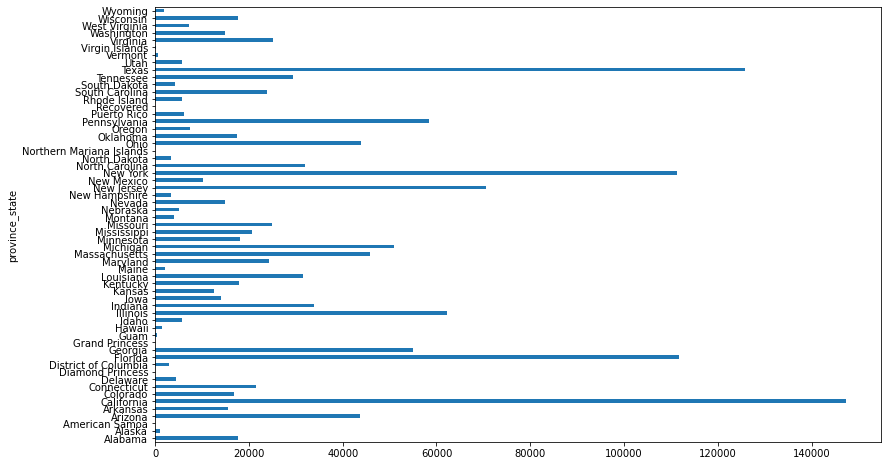

In [93]:
df3.plot.barh(stacked=True,figsize=(13,8))

Pengambilan Kesimpulan
1. Amerika Serikat (US) merupakan salah satu negara paling terdampak covid-19
2. 5 Negara Bagian yang memiliki tingkat kematian tertinggi yaitu California, Florida, New York, Texas dan New Jersey.